# Text Processing

In [1]:
import pandas as pd
from wordcloud import WordCloud, ImageColorGenerator
import nltk

In [4]:
df_tweet_en = pd.read_csv('../datasets/df_tweets_en.csv')
df_tweet_en.tail()

,Unnamed: 0,username,screen_name,user_location,user_verified,followers_count,friends_count,listed_count,tweet_created_at,tweet_text,tweet_coordinates,tweet_place,tweet_favorite_count
495,495,Fiona Nielsen,glyn_dk,NaN,False,2262,3154,363,2020-12-10 17:51:28,"RT @Bob_Wachter: This is one powerful, and hea...",NaN,NaN,0
496,496,Ann Gentle,huckle3erry,aksarbeN,False,293,339,8,2020-12-10 17:49:37,"While the information is sobering, the data vi...",NaN,NaN,0
497,497,Violeta 🕊️,azra_vi,"Ни на небу, ни на земљи",False,746,751,33,2020-12-10 17:49:13,RT @cesifoti: This semester I had the pleasure...,NaN,NaN,0
498,498,Félix Bigand,BigandFelix,NaN,False,29,100,0,2020-12-10 17:45:28,https://t.co/Ovfg02irIG\n\nJust updated PLmoca...,NaN,NaN,0
499,499,Oliver Moisio,OlliTrolley,NaN,False,453,788,2,2020-12-10 17:45:19,RT @CartmanCoD: TONIGHT\n🕖7:00 EST\n\nI'll be ...,NaN,NaN,0


In [5]:
tweets = df_tweet_en[['tweet_text']]
tweets.head()

,tweet_text
0,RT @cesifoti: This semester I had the pleasure...
1,RT @cesifoti: This semester I had the pleasure...
2,RT @cesifoti: This semester I had the pleasure...
3,RT @cesifoti: This semester I had the pleasure...
4,Introduction #d3js for #datavisualizations\n\n...


## Data Cleaning

### 1. Menghilangkan tanda baca

We also need to carefully choose the list of punctuations to exclude depending on the use case. For example, the `string.punctuation` in python contains the following punctuation symbols

`!"#$%&\'()*+,-./:;<=>?@[\\]^_{|}~`

In [6]:
import re

def cleantext(text):
    text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
    text = re.sub('RT :', '', text) #Removing retweets
    text = re.sub('#', '', text) # Removing '#' hash tag
    text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
    return text

tweets['tweet_wo_punc'] = tweets['tweet_text'].apply(cleantext)
tweets.head()

<ipython-input-6-44d9849a8063>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['tweet_wo_punc'] = tweets['tweet_text'].apply(cleantext)


,tweet_text,tweet_wo_punc
0,RT @cesifoti: This semester I had the pleasure...,This semester I had the pleasure to teach dat...
1,RT @cesifoti: This semester I had the pleasure...,This semester I had the pleasure to teach dat...
2,RT @cesifoti: This semester I had the pleasure...,This semester I had the pleasure to teach dat...
3,RT @cesifoti: This semester I had the pleasure...,This semester I had the pleasure to teach dat...
4,Introduction #d3js for #datavisualizations\n\n...,Introduction d3js for datavisualizations\n\nD3...


### 1.2 Menghilangkan Stopwords (kata sambung)

In [7]:
# Stopwords from English language
from nltk.corpus import stopwords

', '.join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [8]:
STOPWORDS = set(stopwords.words('english'))

def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return ' '.join([word for word in str(text).split() if word not in STOPWORDS])

tweets['tweet_wo_stopwords'] = tweets['tweet_wo_punc'].apply(lambda text: remove_stopwords(text))
tweets.head()

<ipython-input-8-58f206022c33>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['tweet_wo_stopwords'] = tweets['tweet_wo_punc'].apply(lambda text: remove_stopwords(text))


,tweet_text,tweet_wo_punc,tweet_wo_stopwords
0,RT @cesifoti: This semester I had the pleasure...,This semester I had the pleasure to teach dat...,This semester I pleasure teach data visualizat...
1,RT @cesifoti: This semester I had the pleasure...,This semester I had the pleasure to teach dat...,This semester I pleasure teach data visualizat...
2,RT @cesifoti: This semester I had the pleasure...,This semester I had the pleasure to teach dat...,This semester I pleasure teach data visualizat...
3,RT @cesifoti: This semester I had the pleasure...,This semester I had the pleasure to teach dat...,This semester I pleasure teach data visualizat...
4,Introduction #d3js for #datavisualizations\n\n...,Introduction d3js for datavisualizations\n\nD3...,Introduction d3js datavisualizations D3.js Jav...


In [ ]:
# from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

# stopword_id = StopWordRemoverFactory().get_stop_words()
# print(stopword_id)

In [ ]:
# more_stopwords = ['kalau', 'kalo', 'klo', 'yg', 'pd', 'ntr', 'tp', 'di', 'ttp', 'ga', 'gak', 'jadi', 'aja']
# # Merge stopword
# stopwords_data = stopword_id + more_stopword
# stopwords_id_dictionary = ArrayDictionary(stopwords_data)
# stopwords = StopWordRemover(stopwords_id_dictionary)

In [ ]:
# tweet_wo_stopwords = []
# for text in tweets['tweet_wo_punc']:
#     tweet_wo_stopwords.append(stopwords.remove(text))

# tweets = tweets.assign(tweet_wo_stopwords=tweet_wo_stopwords)
# tweets.head()

In [9]:
tweets['tweet_wo_stopwords']

0      This semester I pleasure teach data visualizat...
1      This semester I pleasure teach data visualizat...
2      This semester I pleasure teach data visualizat...
3      This semester I pleasure teach data visualizat...
4      Introduction d3js datavisualizations D3.js Jav...
                             ...                        
495    RT _Wachter: This one powerful, heartbreaking,...
496    While information sobering, data visualization...
497    This semester I pleasure teach data visualizat...
498    Just updated PLmocap : A Python library machin...
499    TONIGHT 🕖7:00 EST I'll demoing data visualizat...
Name: tweet_wo_stopwords, Length: 500, dtype: object

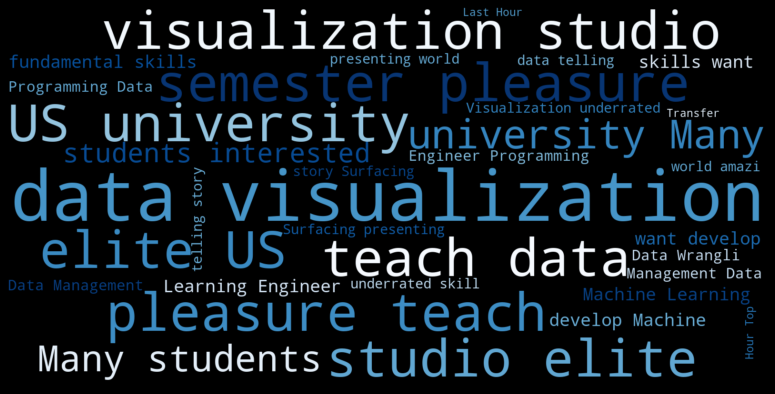

In [10]:
import matplotlib.pyplot as plt

allwords = ' '.join([text for text in tweets['tweet_wo_stopwords']])


wordcloud = WordCloud(colormap='Blues', 
                      width=1600, 
                      height=800,
                      random_state=30,
                      max_font_size=200,
                      min_font_size=20).generate(allwords)
plt.figure(figsize=(15, 7), facecolor='k')              
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()